#### The aim of the project is to predict the happiness score. EDA  is carried out and regression models have been used.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("happiness_score_dataset.txt")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

## EDA

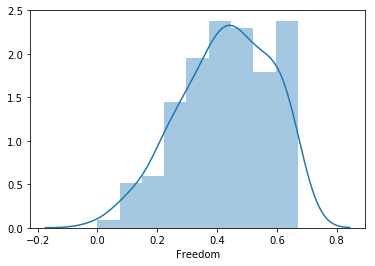

In [8]:
sns.distplot(df['Freedom'])
plt.show()

From the above distplot, it can be seen that Freedom is normally distributed

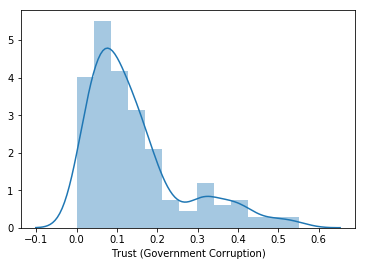

In [9]:
sns.distplot(df['Trust (Government Corruption)'])
plt.show()

From the above distplot, it can be seen that Trust is right skewed

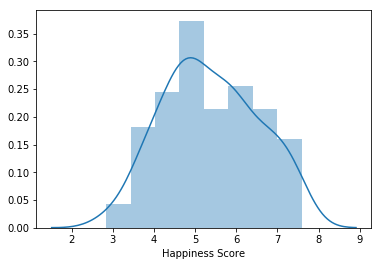

In [10]:
sns.distplot(df['Happiness Score'])
plt.show()

From the above distplot, it can be seen that Happiness score is normally distributed

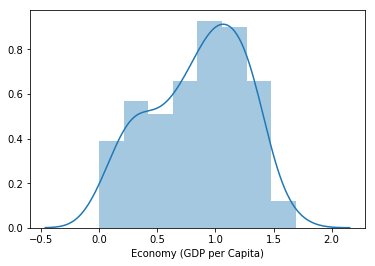

In [11]:
sns.distplot(df['Economy (GDP per Capita)'])
plt.show()

From the above distplot, it can be seen that Economy is close to normal distribution

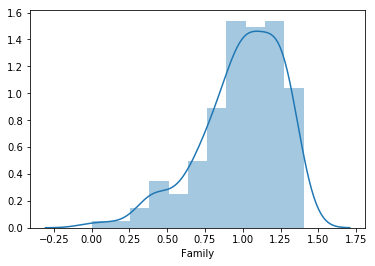

In [12]:
sns.distplot(df['Family'])
plt.show()

From the above distplot, it can be seen that Family is left skewed

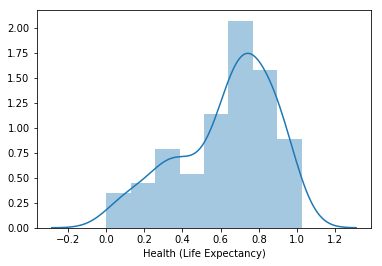

In [13]:
sns.distplot(df['Health (Life Expectancy)'])
plt.show()

From the above distplot, it can be seen that health is left skewed

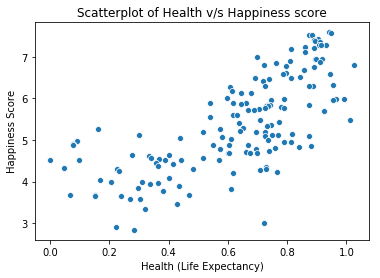

In [14]:
sns.scatterplot(df['Health (Life Expectancy)'],df['Happiness Score'])
plt.title("Scatterplot of Health v/s Happiness score")
plt.show()

From the above scatterplot, health and happiness are positively correlated

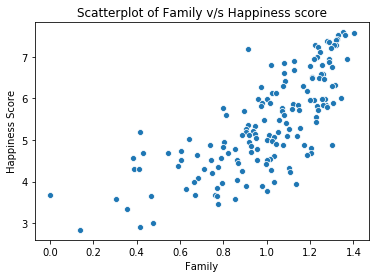

In [15]:
sns.scatterplot(df['Family'],df['Happiness Score'])
plt.title("Scatterplot of Family v/s Happiness score")
plt.show()

From the above scatterplot, Family and happiness score are positively correlated

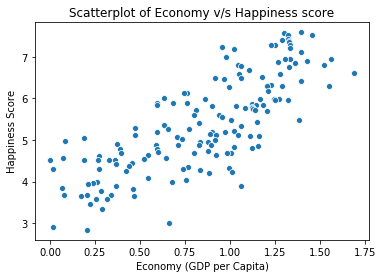

In [16]:
sns.scatterplot(df['Economy (GDP per Capita)'],df['Happiness Score'])
plt.title("Scatterplot of Economy v/s Happiness score")
plt.show()

From the above scatterplot, Economy and happiness score are positively correlated

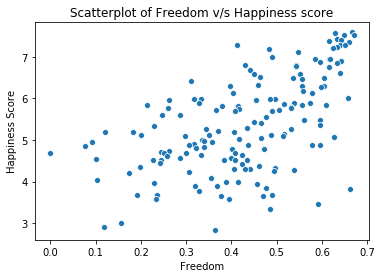

In [17]:
sns.scatterplot(df['Freedom'],df['Happiness Score'])
plt.title("Scatterplot of Freedom v/s Happiness score")
plt.show()

From the above scatterplot, freedom and happiness score are positively correlated

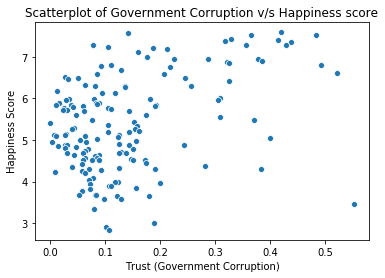

In [18]:
sns.scatterplot(df['Trust (Government Corruption)'],df['Happiness Score'])
plt.title("Scatterplot of Government Corruption v/s Happiness score")
plt.show()

From the above scatterplot, Trust and happiness score are less positively correlated

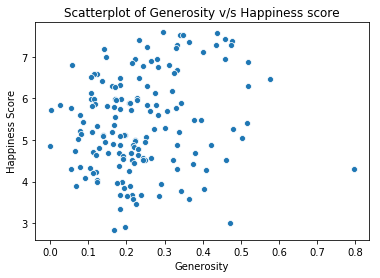

In [19]:
sns.scatterplot(df['Generosity'],df['Happiness Score'])
plt.title("Scatterplot of Generosity v/s Happiness score")
plt.show()

From the above scatterplot,drawing a relationship between Generosity and happiness is difficult

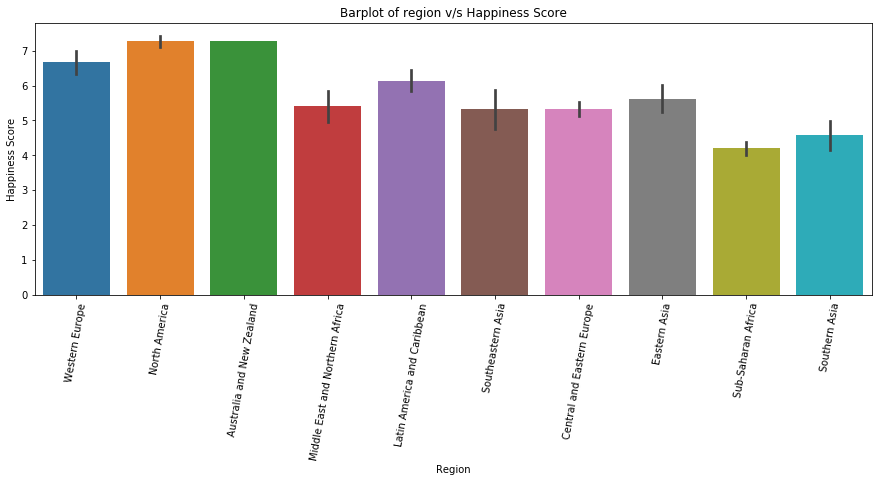

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(df['Region'],df['Happiness Score'])
plt.xticks(rotation=80)
plt.title("Barplot of region v/s Happiness Score")
plt.show()

From the above barplot,it can be seen that North America and Australia and New Zealand have comparitively higher happiness score as compared to other areas.

In [21]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [22]:
#dropping insignificant columns
df.drop(['Country','Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=True)
df.columns

Index(['Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

## Get dummies for 'Region column'

In [23]:
status=pd.get_dummies(df['Region'],drop_first=True,prefix="region")
df=pd.concat([df,status],axis=1)
df.drop('Region',axis=1,inplace=True)

## Define X and y

In [24]:
X=df.drop("Happiness Score",axis=1)
X.head(2)

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,1
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,1


In [25]:
y=df["Happiness Score"]
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

## Train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [28]:
#fit the model to train data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# train data prediction
y_pred_train=lr.predict(X_train)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_train,y_pred_train)

0.8458294960015372

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_train,y_pred_train)

0.20730699834438027

In [34]:
#test data prediction
y_pred_test=lr.predict(X_test)

In [35]:
r2_score(y_test,y_pred_test)

0.7154105697053222

In [36]:
mean_squared_error(y_test,y_pred_test)

0.32695491180012154

## SVR

In [37]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')

In [38]:
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred_train=svr.predict(X_train)

In [40]:
r2_score(y_train,y_pred_train)

0.8211778238537991

In [41]:
mean_squared_error(y_train,y_pred_train)

0.24045512995565332

In [42]:
y_pred_test=svr.predict(X_test)

In [43]:
r2_score(y_test,y_pred_test)

0.682082615888826

In [44]:
mean_squared_error(y_test,y_pred_test)

0.36524424035764397

Since Linear sklearn's Linear regression is giving better r2 score, that model can be used for test dataset

## Serialization

In [45]:
import pickle

In [46]:
#Saving the model
happy_model = pickle.dumps(lr) 

In [47]:
#Load the model whenever required
lr_from_pickle = pickle.loads(happy_model) 

In [48]:
#Use model for prediction
lr_from_pickle.predict(X_test)

array([5.62188392, 5.93464714, 5.57930184, 5.51149428, 5.94683882,
       4.42368288, 5.6275812 , 5.07577714, 7.13078314, 5.01980811,
       3.99015118, 5.26843539, 6.08080881, 6.02353186, 5.64370826,
       4.53403171, 4.19197335, 6.00304018, 7.38652591, 6.99965444,
       6.27291912, 5.22357837, 5.76038681, 5.65759897, 4.61949923,
       6.71127768, 5.40112877, 5.35348496, 3.65689947, 3.2267057 ,
       4.50734471, 4.26134283, 4.87024205, 6.33453489, 5.67073289,
       5.14183411, 3.39430035, 4.80925072, 6.82243524, 4.20156495,
       4.5561343 , 4.7998272 , 5.15950668, 4.50731666, 4.38198882,
       5.03464418, 4.74687542, 5.64864255])